<a href="https://colab.research.google.com/github/v3dant0/Projects/blob/main/PUBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Reading data

In [2]:
df = pd.read_csv("pubg.csv")

In [3]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000        0.0          0.00        0.0             0.0   
1        0.0045        0.0         11.04        0.0             0.0   
2        0.0000        0.0          0.00        0.0             0.0   
3        0.0000        0.0          0.00        0.0             0.0   
4        0.0000        0.0          0.00        0.0             0.0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80              1.0     1466.0        0.4444  
1       1434.00              5.0        0.0        0.6400  
2        161.80              2.0        0.0        0.7755  
3        202.70              3.0        0.0        0.1667  
4         49.75              2.0        0.0        0.1875  

[5 rows x 29 columns]

In [4]:
df.shape

(3499645, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499645 entries, 0 to 3499644
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        float64
 22  swimDistance     float64
 23  teamKills        float64
 24  vehicleDestroys  float64
 25  walkDistance     float64
 26  weaponsAcquired  float64
 27  winPoints   

Data Description:

DBNOs – Number of enemy players knocked.

assists – Number of enemy players this player damaged that were killed by teammates.

boosts – Number of boost items used.

damageDealt – Total damage dealt. Note: Self-inflicted damage is subtracted.

headshotKills – Number of enemy players killed with headshots.

heals – Number of healing items used.

Id – Player’s ID.

killPlace – Ranking in match of number of enemy players killed.

killPoints – Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter. If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as "None.")

killStreaks – Max number of enemy players killed in a short amount of time.

kills – Number of enemy players killed.

longestKill – Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchDuration – Duration of match in seconds.

matchId – ID to identify match. There are no matches that are in both the training and testing set.

matchType – String identifying the game mode the data comes from. The standard modes are "solo", "duo", "squad", "solo-fpp", "duo-fpp", and "squad-fpp"; other modes are from events or custom matches.

rankPoints – Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of "None".

revives – Number of times this player revived teammates.

rideDistance – Total distance traveled in vehicles measured in meters.

roadKills – Number of kills while in a vehicle.

swimDistance – Total distance traveled by swimming measured in meters.

teamKills – Number of times this player killed a teammate.

vehicleDestroys – Number of vehicles destroyed.

walkDistance – Total distance traveled on foot measured in meters.

weaponsAcquired – Number of weapons picked up.

winPoints – Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters. If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as "None.")

groupId – ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups – Number of groups we have data for in the match.

maxPlace – Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc – The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


# Data Wrangling and Cleaning

Dealing with Null Values

In [6]:
df['winPlacePerc'].isnull().sum()

2

In [7]:
df[df['winPlacePerc'].isnull()]

Id         groupId         matchId  assists  boosts  \
2744604  f70c74418bb064  12dfbede33f92b  224a123c53e008        0       0   
3499644  754d0693f9d77b  72dc8ef3e6ce64  5afca2bcc0f85a        1       5   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
2744604          0.0      0              0      0          1  ...        0   
3499644        586.4      3              0      7          9  ...        1   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
2744604           0.0        0.0           0.0        0.0             0.0   
3499644        5118.0        NaN           NaN        NaN             NaN   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
2744604           0.0              0.0        0.0           NaN  
3499644           NaN              NaN        NaN           NaN  

[2 rows x 29 columns]

In [8]:
df = df.dropna(axis=0)

In [9]:
df['winPlacePerc'].isnull().sum()

0

Understanding Players distribution in a game

In [10]:
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [11]:
df

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
3499639  7ee328f71ccb91  640eb8e74a10ab  e5f6ee261279a3        0       0   
3499640  07da4d1de9d728  2a7da0d8994cea  cf0cbc4fdd6b68        0       4   
3499641  ed5283d8cfd762  08c1bb54ebef5a  5c7dbb92dfbdeb        0       0   
3499642  5a9f686ad4b36d  0bfa1b90fb6571  ea89f7eda113cc        0       2   
3499643  21a572004f09fe  693caf9a91e053  724f816cdf7a48        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  \
0               0.00      0              0      0         60  ...   
1              91.47      0              0      0         57  ...   
2              68.00      0              0      0         47  ...   
3              32.90      0              0      0         75  ...   
4             100.00      0              0      0         45  ...   
...              ...    ...            ...    ...        ...  ...   
3499639       150.50      1              0      1         24  ...   
3499640       105.00      0              0      3         19  ...   
3499641        19.80      0              0      0         75  ...   
3499642       178.90      2              0      3         28  ...   
3499643       155.70      1              0      0         34  ...   

         rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
0              0.0000        0.0          0.00        0.0              0.0   
1              0.0045        0.0         11.04        0.0              0.0   
2              0.0000        0.0          0.00        0.0              0.0   
3              0.0000        0.0          0.00        0.0              0.0   
4              0.0000        0.0          0.00        0.0              0.0   
...               ...        ...           ...        ...              ...   
3499639        0.0000        0.0          0.00        0.0              0.0   
3499640        0.0000        0.0        520.00        0.0              0.0   
3499641        0.0000        0.0          0.00        0.0              0.0   
3499642        0.0141        0.0         21.81        0.0              0.0   
3499643        0.0000        0.0          0.00        0.0              0.0   

        walkDistance  weaponsAcquired  winPoints  winPlacePerc  playersJoined  
0             244.80              1.0     1466.0        0.4444             77  
1            1434.00              5.0        0.0        0.6400             75  
2             161.80              2.0        0.0        0.7755             74  
3             202.70              3.0        0.0        0.1667             75  
4              49.75              2.0        0.0        0.1875             79  
...              ...              ...        ...           ...            ...  
3499639        50.65              2.0        0.0        0.7857             72  
3499640      2103.00              5.0        0.0        0.7957             76  
3499641        82.11              3.0        0.0        0.1190             58  
3499642      6680.00              3.0        0.0        0.5862             82  
3499643        50.52              3.0        0.0        0.4815             76  

[3499643 rows x 30 columns]

In [12]:
import plotly.express as px


filtered_df = df[df['playersJoined'] >= 75]
fig = px.histogram(filtered_df, x="playersJoined", title="Count of Players Joined")
fig.show()

# Analysing data

In [13]:
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['killswithoutMoving'] = (df['kills']>0) & (df['totalDistance'] ==0)

In [14]:
df[df['killswithoutMoving'] == True].shape

(1218, 32)

Dropping modders and hackers

In [15]:
df.drop(df[df['killswithoutMoving'] == True].index, inplace = True)

In [16]:
df[df['roadKills']>5].shape

(35, 32)

In [17]:
df.drop(df[df['roadKills']>5].index, inplace = True)

<Axes: xlabel='kills', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, '15'),
  Text(1, 0, '16'),
  Text(2, 0, '17'),
  Text(3, 0, '18'),
  Text(4, 0, '19'),
  Text(5, 0, '20'),
  Text(6, 0, '21'),
  Text(7, 0, '22'),
  Text(8, 0, '23'),
  Text(9, 0, '24'),
  Text(10, 0, '25'),
  Text(11, 0, '26'),
  Text(12, 0, '27'),
  Text(13, 0, '28'),
  Text(14, 0, '29'),
  Text(15, 0, '30'),
  Text(16, 0, '31'),
  Text(17, 0, '32'),
  Text(18, 0, '33'),
  Text(19, 0, '34'),
  Text(20, 0, '35'),
  Text(21, 0, '36'),
  Text(22, 0, '37'),
  Text(23, 0, '38'),
  Text(24, 0, '39'),
  Text(25, 0, '40'),
  Text(26, 0, '41'),
  Text(27, 0, '42'),
  Text(28, 0, '43'),
  Text(29, 0, '44'),
  Text(30, 0, '45'),
  Text(31, 0, '46'),
  Text(32, 0, '47'),
  Text(33, 0, '48'),
  Text(34, 0, '49'),
  Text(35, 0, '50'),
  Tex

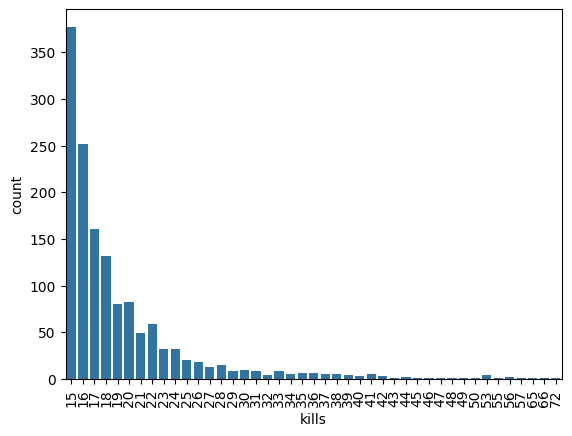

In [18]:
sns.countplot(x='kills', data=df[df['kills'] >= 15])
plt.xticks(rotation=90)
plt.show()

In [19]:
df[df['kills']> 25].shape

(149, 32)

In [20]:
df.drop(df[df['kills']> 25].index, inplace = True)

In [21]:
df['headshot_rate'] = df['headshotKills']/df['kills']


<Figure size 1200x600 with 0 Axes>

<ipython-input-22-f3f70688932c>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='headshot_rate', ylabel='Density'>

Text(0.5, 0, 'Headshot Rate')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Headshot Rate')

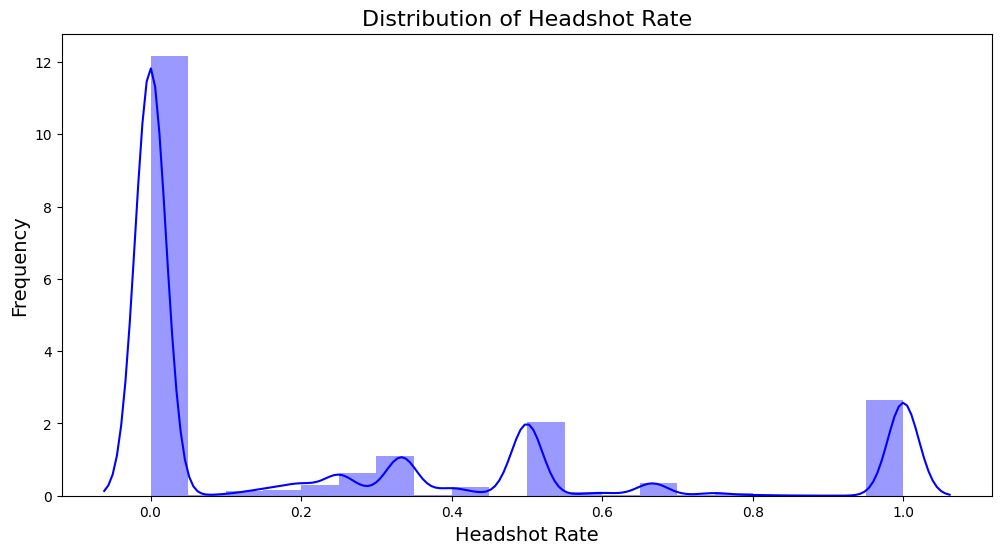

In [22]:
plt.figure(figsize=(12, 6))
sns.distplot(df['headshot_rate'], bins=20, kde=True, color='blue')
plt.xlabel('Headshot Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Headshot Rate', fontsize=16)
plt.show()

In [23]:
df[(df['headshot_rate'] == 1) & (df['kills']>5)].shape

(148, 33)

In [24]:
df.drop(df[(df['headshot_rate'] == 1) & (df['kills']>5)].index, inplace = True)

In [25]:
df[df['longestKill']>=500].shape

(1380, 33)

In [26]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

<Figure size 1200x600 with 0 Axes>

<ipython-input-27-da5c478d33bd>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='weaponsAcquired', ylabel='Density'>

Text(0.5, 1.0, 'Weapons Distribution')

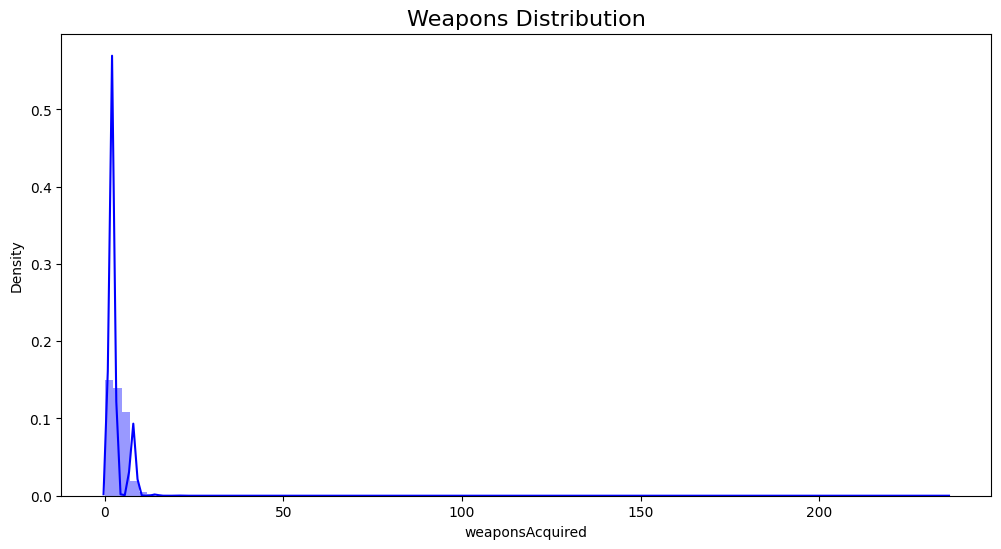

In [27]:
plt.figure(figsize=(12, 6))
sns.distplot(df['weaponsAcquired'], bins=100, kde=True, color='blue')
plt.title('Weapons Distribution', fontsize=16)
plt.show()

In [28]:
df[df['weaponsAcquired']>=15].shape

(5496, 33)

In [29]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

In [30]:
df.isnull().sum()

Id                          0
groupId                     0
matchId                     0
assists                     0
boosts                      0
damageDealt                 0
DBNOs                       0
headshotKills               0
heals                       0
killPlace                   0
killPoints                  0
kills                       0
killStreaks                 0
longestKill                 0
matchDuration               0
matchType                   0
maxPlace                    0
numGroups                   0
rankPoints                  0
revives                     0
rideDistance                0
roadKills                   0
swimDistance                0
teamKills                   0
vehicleDestroys             0
walkDistance                0
weaponsAcquired             0
winPoints                   0
winPlacePerc                0
playersJoined               0
totalDistance               0
killswithoutMoving          0
headshot_rate         1989739
dtype: int64

In [31]:
df['headshot_rate'] = df['headshot_rate'].fillna(0)

In [32]:
df.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

<Figure size 3000x3000 with 0 Axes>

<Axes: >

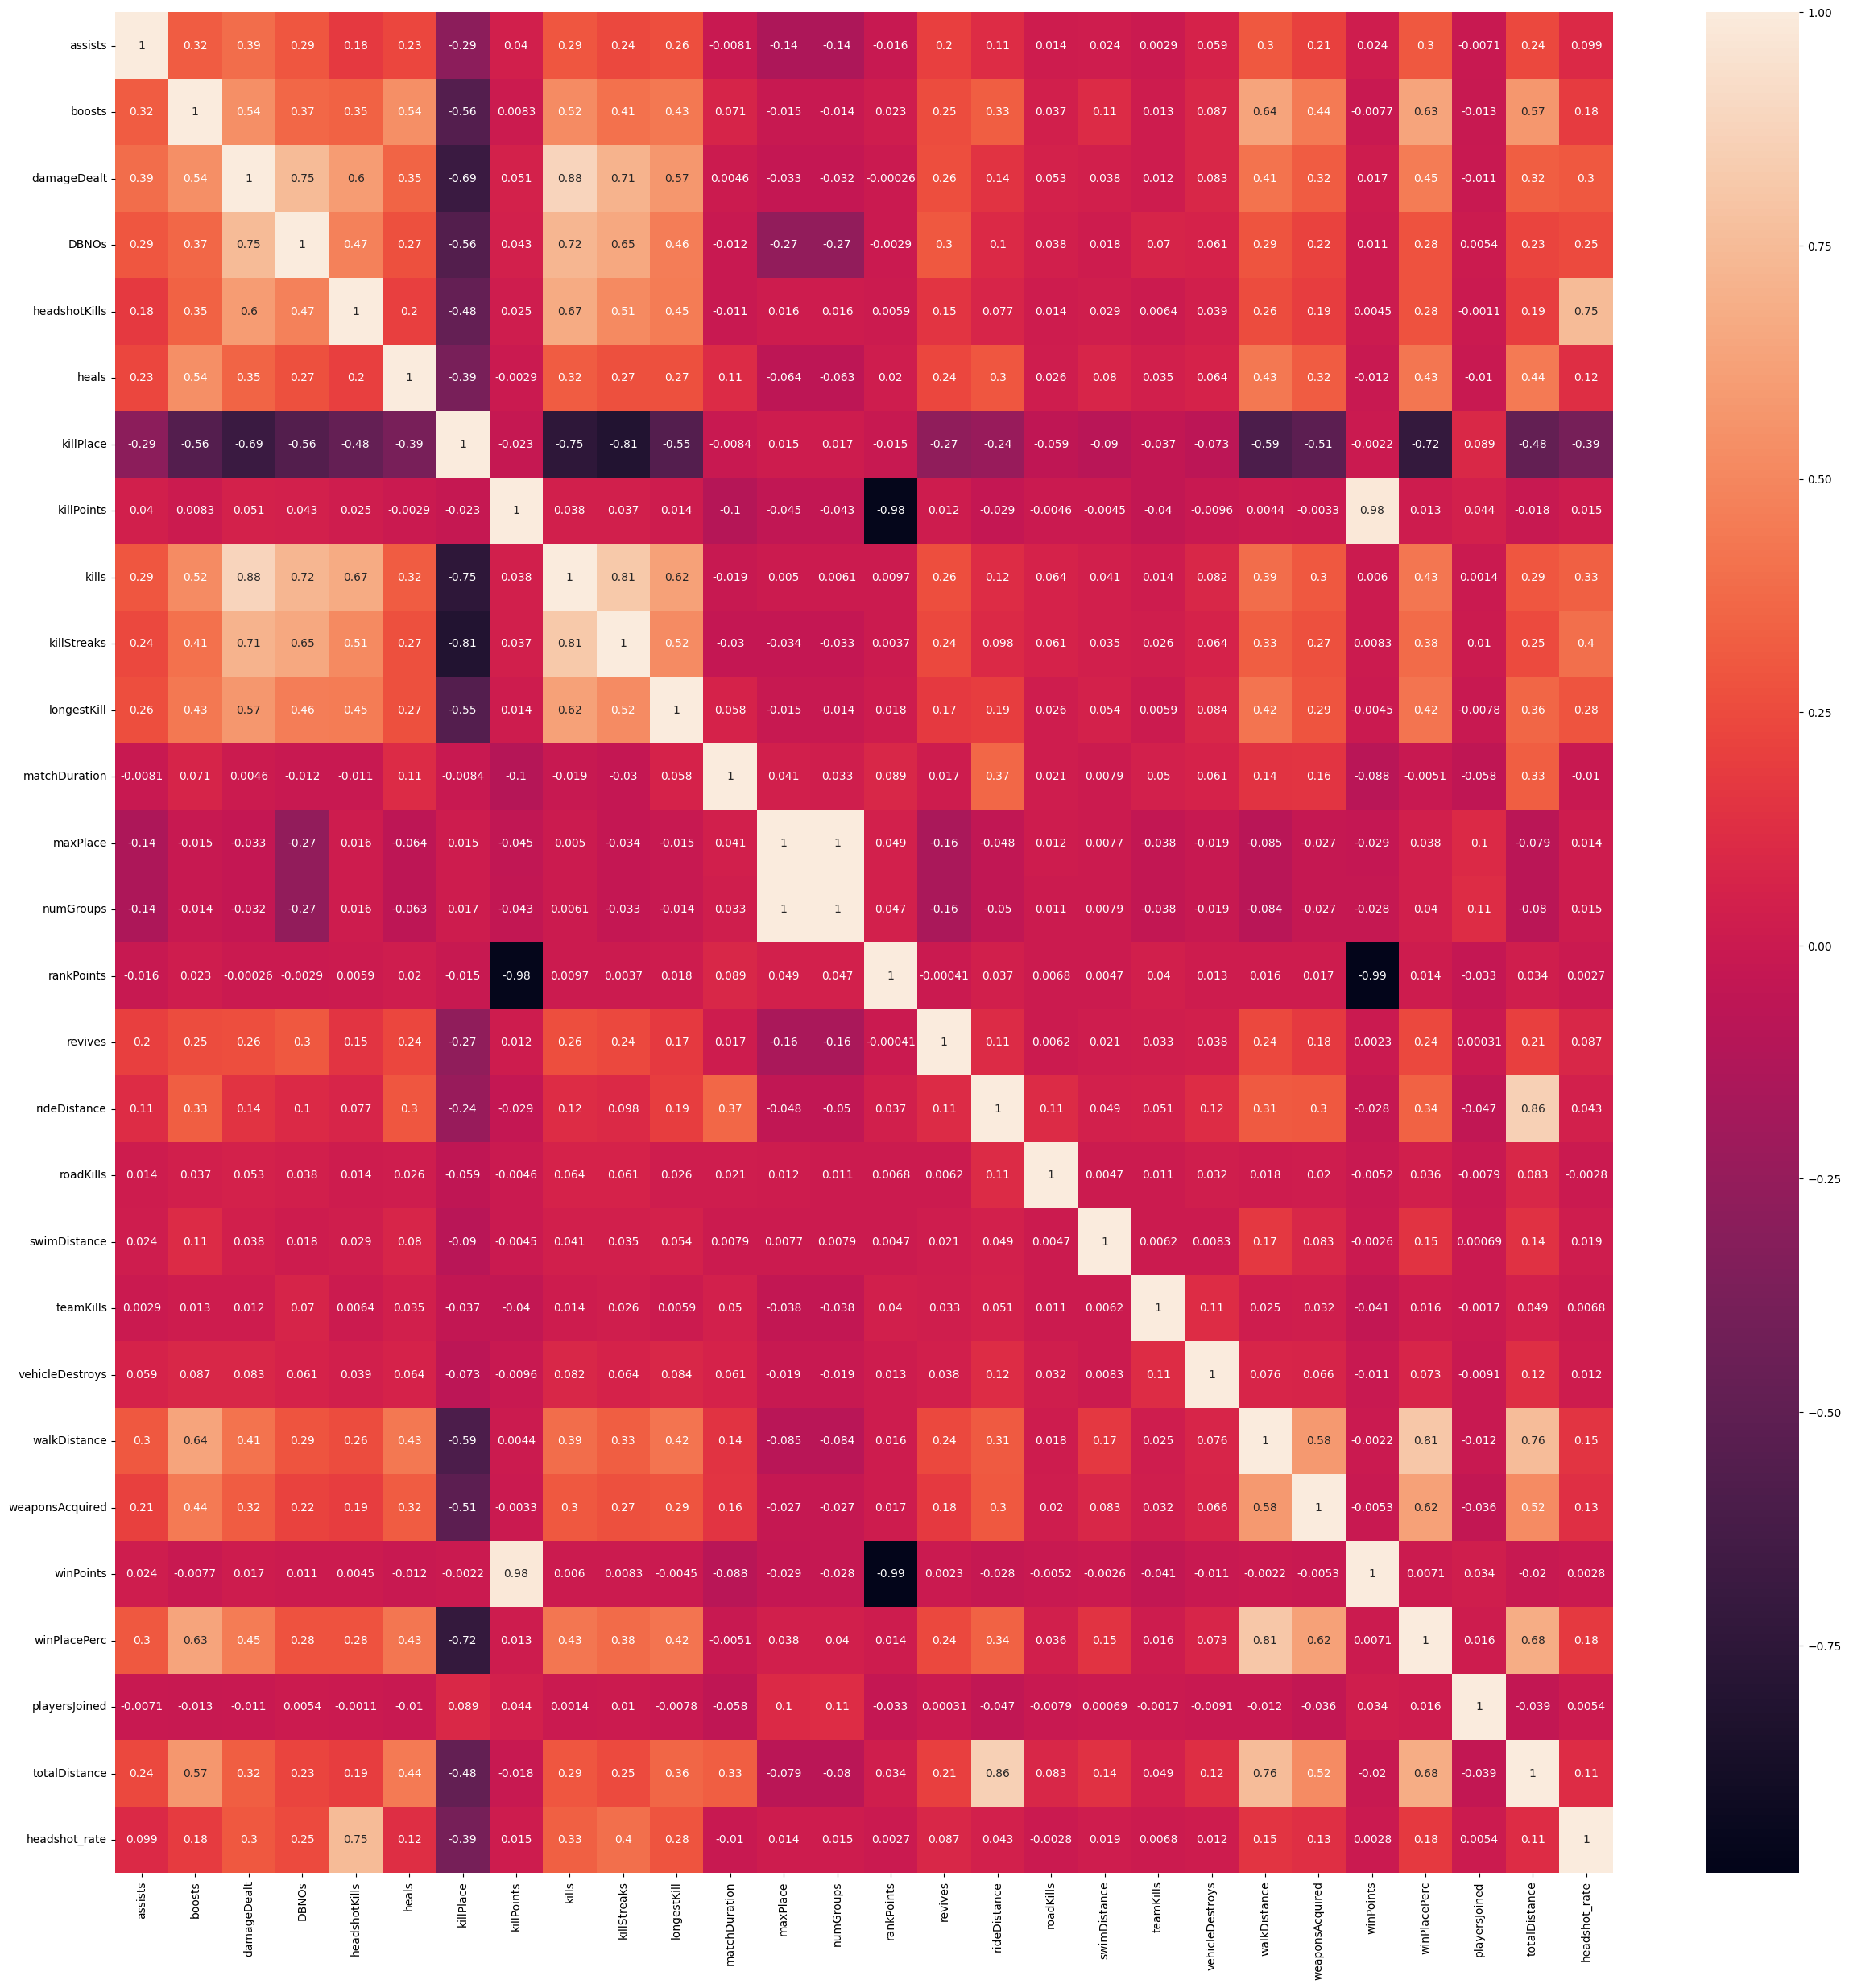

In [33]:
plt.figure(figsize = [30,30])
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Feature Engineering

In [34]:
normalising_factor = (100 - df['playersJoined']/100) + 1

In [35]:
df['killsNorm'] = df['kills']*normalising_factor
df['damageDealtNorm'] = df['damageDealt']*normalising_factor
df['maxPlaceNorm'] = df['maxPlace']*normalising_factor
df['matchDurationNorm'] = df['matchDuration']*normalising_factor
df['healsnboosts'] = df['heals'] + df['boosts']

In [36]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm', 'healsnboosts'],
      dtype='object')

In [37]:
data = df.drop(columns = ['Id','groupId','matchId','boosts','heals','kills','damageDealt','maxPlace','matchDuration','walkDistance','rideDistance','swimDistance'])

In [38]:
data.head()

assists  DBNOs  headshotKills  killPlace  killPoints  killStreaks  \
0        0      0              0         60        1241            0   
1        0      0              0         57           0            0   
2        1      0              0         47           0            0   
3        0      0              0         75           0            0   
4        0      0              0         45           0            1   

   longestKill  matchType  numGroups  rankPoints  ...  winPlacePerc  \
0         0.00  squad-fpp         26          -1  ...        0.4444   
1         0.00  squad-fpp         25        1484  ...        0.6400   
2         0.00        duo         47        1491  ...        0.7755   
3         0.00  squad-fpp         30        1408  ...        0.1667   
4        58.53   solo-fpp         95        1560  ...        0.1875   

   playersJoined  totalDistance  killswithoutMoving  headshot_rate  killsNorm  \
0             77       244.8000               False            0.0       0.00   
1             75      1445.0445               False            0.0       0.00   
2             74       161.8000               False            0.0       0.00   
3             75       202.7000               False            0.0       0.00   
4             79        49.7500               False            0.0     100.21   

   damageDealtNorm  maxPlaceNorm  matchDurationNorm  healsnboosts  
0           0.0000       2806.44          130900.38             0  
1        9169.8675       2606.50          178144.25             0  
2        6817.6800       5013.00          132142.68             0  
3        3298.2250       3107.75          143959.00             0  
4       10021.0000       9720.37          142699.04             0  

[5 rows x 26 columns]

# ML

In [39]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [40]:
x = pd.get_dummies(x, columns = ['matchType','killswithoutMoving'])
x = x.astype(int)

In [41]:
features = x.columns

In [42]:
x.head()

assists  DBNOs  headshotKills  killPlace  killPoints  killStreaks  \
0        0      0              0         60        1241            0   
1        0      0              0         57           0            0   
2        1      0              0         47           0            0   
3        0      0              0         75           0            0   
4        0      0              0         45           0            1   

   longestKill  numGroups  rankPoints  revives  ...  matchType_normal-duo-fpp  \
0            0         26          -1        0  ...                         0   
1            0         25        1484        0  ...                         0   
2            0         47        1491        0  ...                         0   
3            0         30        1408        0  ...                         0   
4           58         95        1560        0  ...                         0   

   matchType_normal-solo  matchType_normal-solo-fpp  matchType_normal-squad  \
0                      0                          0                       0   
1                      0                          0                       0   
2                      0                          0                       0   
3                      0                          0                       0   
4                      0                          0                       0   

   matchType_normal-squad-fpp  matchType_solo  matchType_solo-fpp  \
0                           0               0                   0   
1                           0               0                   0   
2                           0               0                   0   
3                           0               0                   0   
4                           0               0                   1   

   matchType_squad  matchType_squad-fpp  killswithoutMoving_False  
0                0                    1                         1  
1                0                    1                         1  
2                0                    0                         1  
3                0                    1                         1  
4                0                    0                         1  

[5 rows x 40 columns]

Scaling the data

In [43]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=features)

Splitting data

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 0)

CatBoostModel

In [45]:
import catboost as cb
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [46]:
model = cb.CatBoostRegressor(loss_function = 'RMSE')

In [47]:
grid = {'iterations':[100,150],
       'learning_rate': [0.03,0.1],
       'depth': [2,4,6,8]}

model.grid_search(grid,train_dataset)

0:	learn: 0.5484245	test: 0.5471682	best: 0.5471682 (0)	total: 309ms	remaining: 30.6s
1:	learn: 0.5335854	test: 0.5323582	best: 0.5323582 (1)	total: 531ms	remaining: 26s
2:	learn: 0.5192084	test: 0.5180126	best: 0.5180126 (2)	total: 745ms	remaining: 24.1s
3:	learn: 0.5053086	test: 0.5041447	best: 0.5041447 (3)	total: 950ms	remaining: 22.8s
4:	learn: 0.4918538	test: 0.4907191	best: 0.4907191 (4)	total: 1.16s	remaining: 22.1s
5:	learn: 0.4788409	test: 0.4777337	best: 0.4777337 (5)	total: 1.38s	remaining: 21.7s
6:	learn: 0.4662401	test: 0.4651604	best: 0.4651604 (6)	total: 1.6s	remaining: 21.3s
7:	learn: 0.4540230	test: 0.4529674	best: 0.4529674 (7)	total: 1.81s	remaining: 20.9s
8:	learn: 0.4422172	test: 0.4411869	best: 0.4411869 (8)	total: 2.03s	remaining: 20.5s
9:	learn: 0.4308018	test: 0.4297964	best: 0.4297964 (9)	total: 2.23s	remaining: 20.1s
10:	learn: 0.4197866	test: 0.4188057	best: 0.4188057 (10)	total: 2.45s	remaining: 19.8s
11:	learn: 0.4091186	test: 0.4081606	best: 0.4081606 (1

KeyboardInterrupt: 

In [ ]:
x_scaled = pd.DataFrame(x_scaled, columns=features)

feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending = False)
feature_importance_df

In [ ]:
pred = model.predict(xtest)

In [ ]:
rmse = mean_squared_error(ytest, pred)
r2 = r2_score(ytest, pred)
print(rmse,r2)

In [ ]:
!pip install --upgrade matplotlib seaborn

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to test additional models
def test_more_models(x_scaled, y):
    # Split data into training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

    # List of models to test
    models = {
        "RandomForestRegressor": RandomForestRegressor(n_estimators=100, max_depth=8, random_state=0),
        "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0),
        "LinearRegression": LinearRegression(),

    }

    # Iterate through each model and evaluate
    for model_name, model in models.items():
        print(f"\nTesting {model_name}...")

        # Train the model
        model.fit(xtrain, ytrain)

        # Predict and evaluate
        pred = model.predict(xtest)
        rmse = mean_squared_error(ytest, pred)
        r2 = r2_score(ytest, pred)

        print(f"{model_name} - RMSE: {rmse:.6f}, R2: {r2:.6f}")

# Call the function to test more models
test_more_models(x_scaled, y)

